# Importing the Packages that we will Using

In [5]:
import numpy as np

import pandas as pd

import seaborn as sb

import matplotlib

import matplotlib.pyplot as plt

plt.style.use('ggplot')

from matplotlib.pyplot import figure

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (12,8)  # Adjust the configuration of plots we create

# Reading the data

## we create a dataframe from the imported data

In [72]:
Data = pd.read_csv(r'C:\Users\Omkar\Desktop\Folder\Python\movies.csv')

In [95]:
# Lets look at the data

Data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3719,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
5288,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
1788,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
4717,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
5144,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


**Our main hypothesis for testing is that Company and Gross Income are highly Correlated**

## Hypothesis : Company and Gross Revenue Of a Movie are Highly Correlated

In [13]:
# Looking for missing data

for col in Data.columns:
    pct_missing = np.mean(Data[col].isnull())
    print('{} - {}%'.format(col,pct_missing))
    
    
# Here as we don,t have none zero value for any of the column , this means that we have no column with null or empty field

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [14]:
# Data Types for our column

Data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [73]:
Data = Data.sort_values(by = ['gross'],inplace = False , ascending=False)

**To display our entire data in the window we run following command**

In [26]:
pd.set_option('display.max_rows',None)   # now due to this we can retrive the entire dataframe

In [74]:
# To check for duplicates

Data = Data.drop_duplicates()

In [37]:
## The Budget is going to have high correlation with the gross revenue
## Company will have high correlation

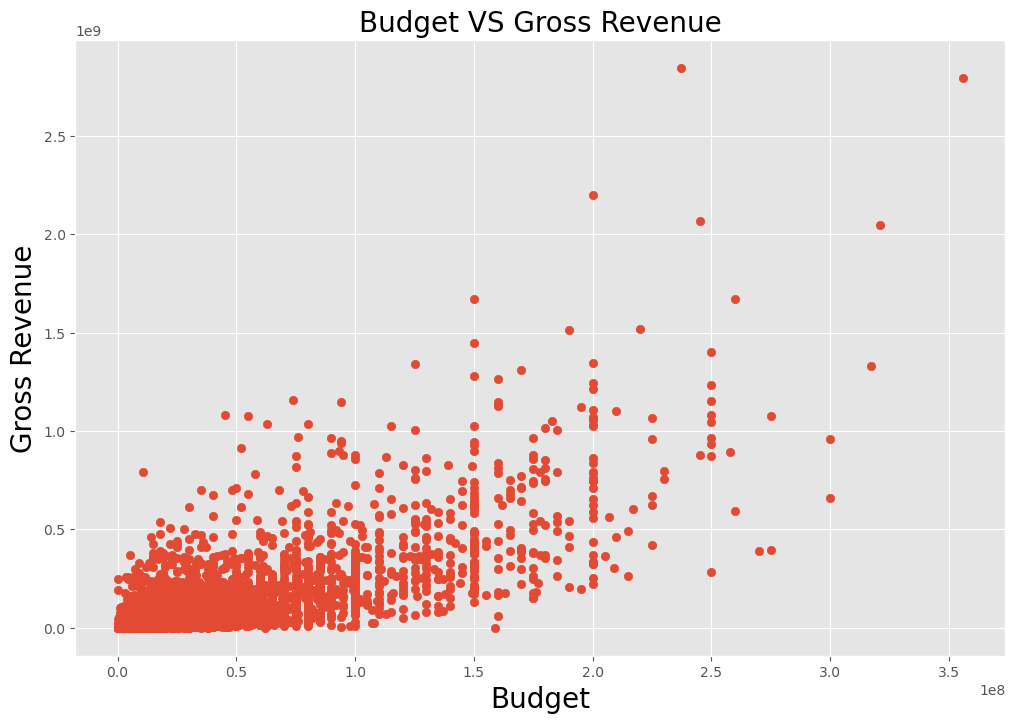

In [45]:
# Build a scatter plot with Budget Vs Gross revenue to understand the relation between them


plt.scatter(x = Data['budget'],y = Data['gross'])

plt.title("Budget VS Gross Revenue",size = 20)

plt.xlabel("Budget",size = 20)

plt.ylabel("Gross Revenue",size = 20)

plt.show()

In [96]:
Data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3719,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
5288,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
1788,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
4717,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
5144,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


Text(0, 0.5, 'Gross Revenue')

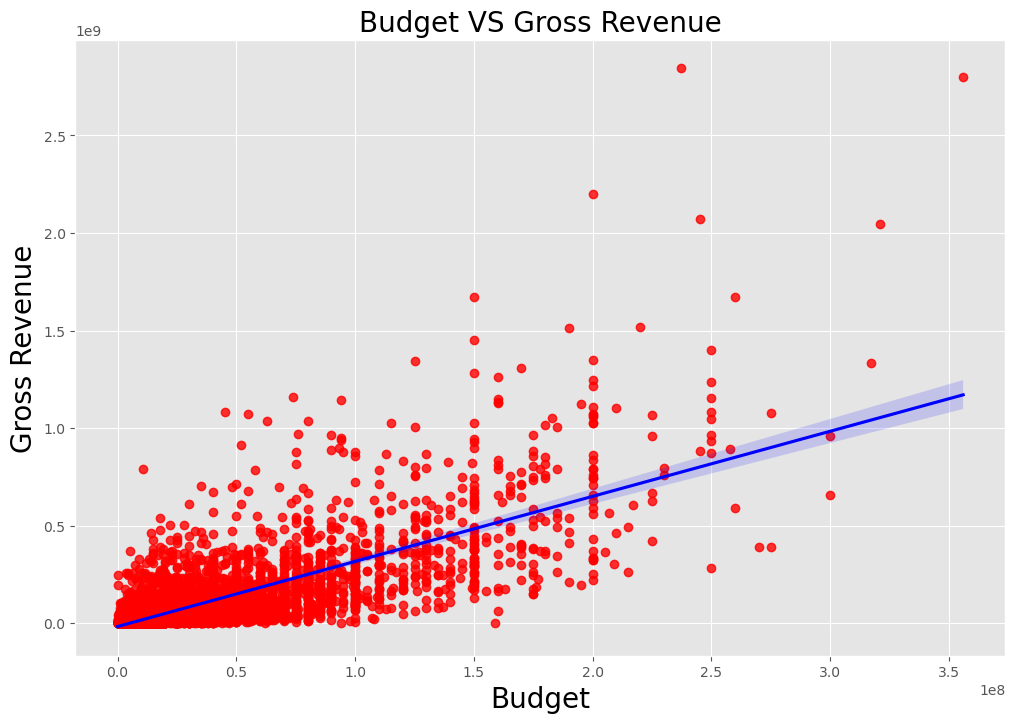

In [49]:
# Plot budget vs gross using seaborn

Chart = sb.regplot(x = 'budget' , y = 'gross' , data = Data , scatter_kws = {"color" : "red"} , line_kws = {"color" : "blue"})
Chart.set_title('Budget VS Gross Revenue' , fontdict = {'size' : 20})

Chart.set_xlabel('Budget' , fontdict = {'size':20})

Chart.set_ylabel('Gross Revenue' , fontdict = {'size' : 20})

In [50]:
# Lets look at correlation

In [60]:
Data.corr(numeric_only = True)  # As our data also has string fields, we set numeric_only = True as it will as to find correlation between column with numeric values only

,year,score,votes,budget,gross,runtime
year,1.000000,0.056409,0.205830,0.327195,0.274403,0.074570
score,0.056409,1.000000,0.474327,0.071977,0.222719,0.414386
votes,0.205830,0.474327,1.000000,0.439460,0.614742,0.352331
budget,0.327195,0.071977,0.439460,1.000000,0.740132,0.318441
gross,0.274403,0.222719,0.614742,0.740132,1.000000,0.275606
runtime,0.074570,0.414386,0.352331,0.318441,0.275606,1.000000


Here in correlation we have different methods . Pearson is by default . We also have Kendall and Spearman

In [61]:
# This tells us that there is a high correlation between budget and gross revenue

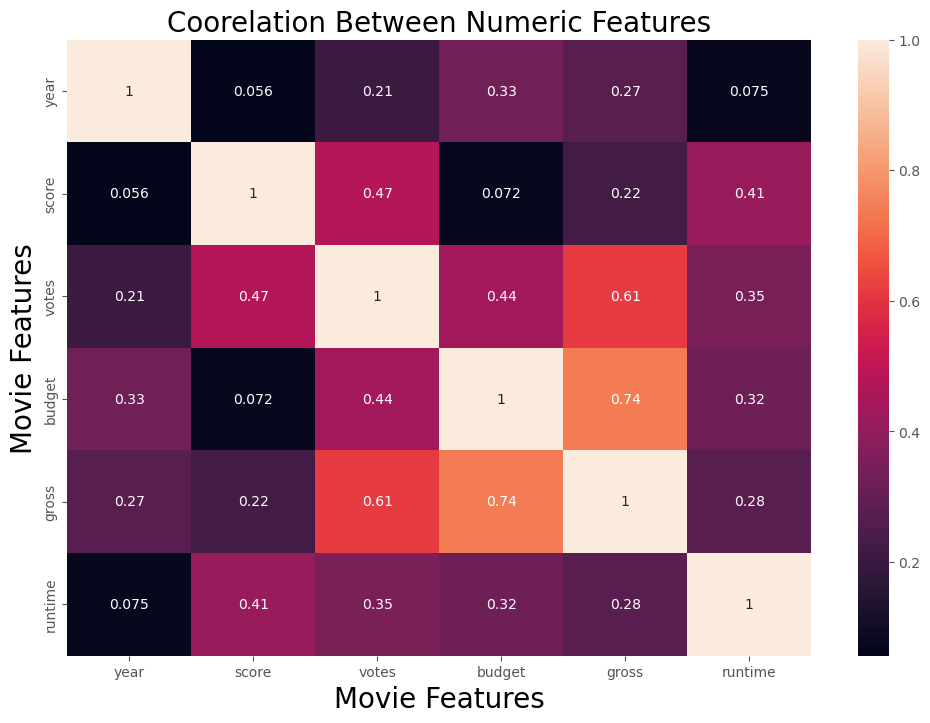

In [65]:
# Now we try to visualize the correlation.

corr_mat = Data.corr(numeric_only = True)

plt.title("Coorelation Between Numeric Features",size = 20)

sb.heatmap(corr_mat,annot = True)

plt.xlabel("Movie Features",size = 20)

plt.ylabel("Movie Features",size = 20)

plt.show()

In [66]:
# Look at company
# Here are trying to convert company data into numeric data so that we can use it 
# for correlation purpose

In [97]:
Data_Numerized = Data

for col_name in Data_Numerized.columns:
    if(Data_Numerized[col_name].dtype == 'object'):
        Data_Numerized[col_name] = Data_Numerized[col_name].astype('category')
        Data_Numerized[col_name] = Data_Numerized[col_name].cat.codes
        
Data_Numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3719,385,5,0,2009,526,7.8,1100000,785,1262,1529,47,237000000,2847246203,1380,162
5288,387,5,0,2019,137,8.4,903000,105,513,1467,47,356000000,2797501328,981,181
1788,4896,5,6,1997,533,7.8,1100000,785,1262,1070,47,200000000,2201647264,1380,194
4717,3632,5,0,2015,528,7.8,876000,768,1805,356,47,245000000,2069521700,943,138
5144,388,5,0,2018,145,8.4,897000,105,513,1467,47,321000000,2048359754,981,149


In [70]:
# Now our Entire data has been numerized

In [98]:
Data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3719,385,5,0,2009,526,7.8,1100000,785,1262,1529,47,237000000,2847246203,1380,162
5288,387,5,0,2019,137,8.4,903000,105,513,1467,47,356000000,2797501328,981,181
1788,4896,5,6,1997,533,7.8,1100000,785,1262,1070,47,200000000,2201647264,1380,194
4717,3632,5,0,2015,528,7.8,876000,768,1805,356,47,245000000,2069521700,943,138
5144,388,5,0,2018,145,8.4,897000,105,513,1467,47,321000000,2048359754,981,149


In [99]:
Data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3719,385,5,0,2009,526,7.8,1100000,785,1262,1529,47,237000000,2847246203,1380,162
5288,387,5,0,2019,137,8.4,903000,105,513,1467,47,356000000,2797501328,981,181
1788,4896,5,6,1997,533,7.8,1100000,785,1262,1070,47,200000000,2201647264,1380,194
4717,3632,5,0,2015,528,7.8,876000,768,1805,356,47,245000000,2069521700,943,138
5144,388,5,0,2018,145,8.4,897000,105,513,1467,47,321000000,2048359754,981,149


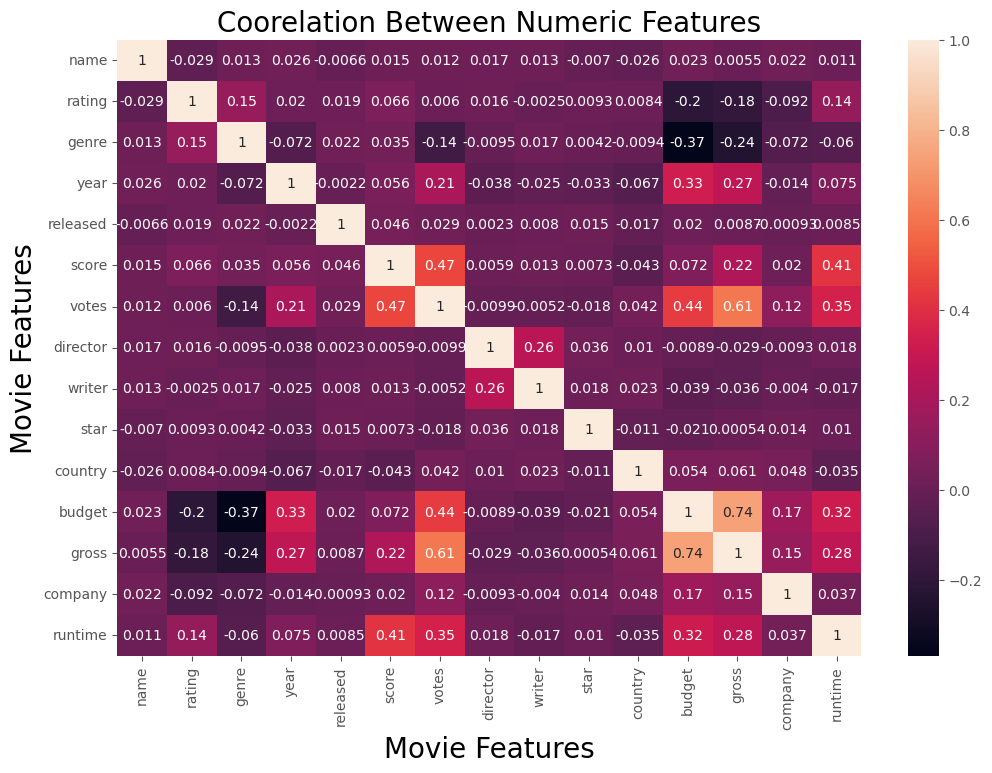

In [76]:
corr_mat = Data_Numerized.corr(numeric_only = True)

plt.title("Coorelation Between Numeric Features",size = 20)

sb.heatmap(corr_mat,annot = True)

plt.xlabel("Movie Features",size = 20)

plt.ylabel("Movie Features",size = 20)

plt.show()

In [77]:
Data_Numerized.corr(numeric_only = True)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029322,0.012752,0.025926,-0.006645,0.014624,0.012347,0.016608,0.012804,-0.007006,-0.025560,0.023268,0.005520,0.022207,0.010817
rating,-0.029322,1.000000,0.148087,0.019550,0.018861,0.065686,0.005992,0.015534,-0.002479,0.009313,0.008382,-0.204311,-0.182033,-0.092472,0.141269
genre,0.012752,0.148087,1.000000,-0.072206,0.022493,0.034631,-0.135959,-0.009454,0.017180,0.004167,-0.009449,-0.368506,-0.244148,-0.072161,-0.059549
year,0.025926,0.019550,-0.072206,1.000000,-0.002194,0.056409,0.205830,-0.038258,-0.024913,-0.033138,-0.066734,0.327195,0.274403,-0.013921,0.074570
released,-0.006645,0.018861,0.022493,-0.002194,1.000000,0.045981,0.029026,0.002287,0.007965,0.014940,-0.017404,0.020078,0.008667,-0.000927,0.008475
score,0.014624,0.065686,0.034631,0.056409,0.045981,1.000000,0.474327,0.005900,0.012989,0.007251,-0.042868,0.071977,0.222719,0.020319,0.414386
votes,0.012347,0.005992,-0.135959,0.205830,0.029026,0.474327,1.000000,-0.009898,-0.005249,-0.017548,0.041957,0.439460,0.614742,0.118406,0.352331
director,0.016608,0.015534,-0.009454,-0.038258,0.002287,0.005900,-0.009898,1.000000,0.261655,0.035750,0.010024,-0.008894,-0.028936,-0.009343,0.017863
writer,0.012804,-0.002479,0.017180,-0.024913,0.007965,0.012989,-0.005249,0.261655,1.000000,0.018406,0.022777,-0.039272,-0.035938,-0.004007,-0.016688
star,-0.007006,0.009313,0.004167,-0.033138,0.014940,0.007251,-0.017548,0.035750,0.018406,1.000000,-0.010564,-0.021169,0.000536,0.014112,0.010361


In [78]:
# Now to do unstakking

In [101]:
correl_Mat = Data_Numerized.corr(numeric_only = True)

corr_pairs = correl_Mat.unstack()

corr_pairs.head()

name  name        1.000000
      rating     -0.029322
      genre       0.012752
      year        0.025926
      released   -0.006645
dtype: float64

In [100]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head()

genre   budget   -0.368506
budget  genre    -0.368506
gross   genre    -0.244148
genre   gross    -0.244148
rating  budget   -0.204311
dtype: float64

## Here we are finding feature with high( > 0.5 ) correlation 

In [92]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]   # High Correlation

In [93]:
high_corr

gross     votes       0.614742
votes     gross       0.614742
budget    gross       0.740132
gross     budget      0.740132
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [94]:
# From the data we can conclude that votes and budget have highest 
# correlation to gross 

# As Company and Gross Revenue is not present in our above table we can conclude that Company has low correlation with Gross 
# Revenue

# ------------------------------------Final Conclusion----------------------------------------

# From the above table we can conclude that Company has low correlation with Gross Revenue of the Movie